# Stochastic differential equations
### Kirill Zakharov

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use("ggplot")

# Wiener process

In [46]:
def wiener_process(dt=0.01, x0=0, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x + np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

In [47]:
Nt = 1000
wp = wiener_process(0.01, 0, Nt)

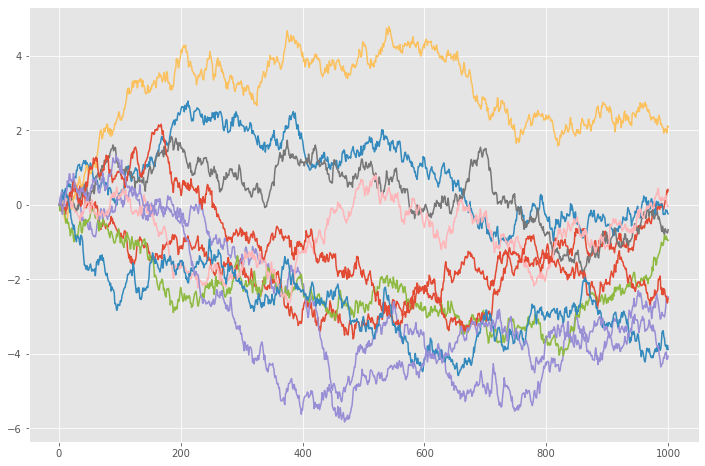

In [48]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))
hist_array = []
for _ in range(10):
    wp = wiener_process(0.01, 0, Nt)
    plt.plot(time, wp)
    hist_array.append(wp)
plt.show()

In [129]:
t = 100
rand_eta = sts.norm(0, 1)
wp[t]*t/2 + (rand_eta.rvs()*t**(3/2))/(2*np.sqrt(3))

-530.669393347001

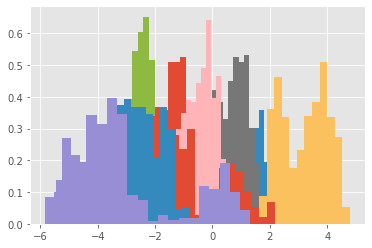

In [52]:
for item in hist_array:
    plt.hist(item, bins=20,density=True)
plt.show()

## Logarithmic motion

In [53]:
mu = 0.3
sigma = 0.1
x0 = 1
def log_motion(dt=0.01, x0=1, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x + mu*x*dt + sigma*x*np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

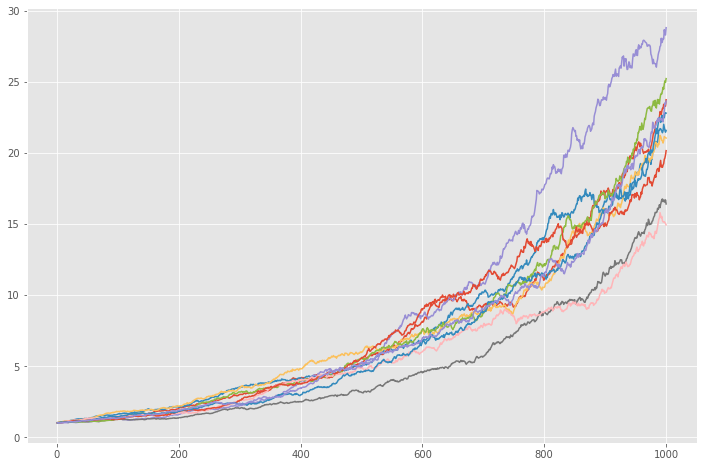

In [54]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))

for _ in range(10):
    wp = log_motion(0.01, x0, Nt)
    plt.plot(time, wp)
plt.show()

In [174]:
# Mean value at the moment t
#x0*np.exp(mu*t)
x0*np.exp(mu*500)

2.167792130437725e+87

In [173]:
t = 999
rand_eta = sts.norm(0, 1)
wp[t]*t/2 + (rand_eta.rvs()*t**(3/2))/(2*np.sqrt(3))

-1557.6317323640349

## Ornstein–Uhlenbeck process

In [111]:
beta = 0.3
alpha = 2
sigma = 0.2

def o_u_process(dt=0.01, x0=0, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x - beta*(x-alpha)*dt + sigma*np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

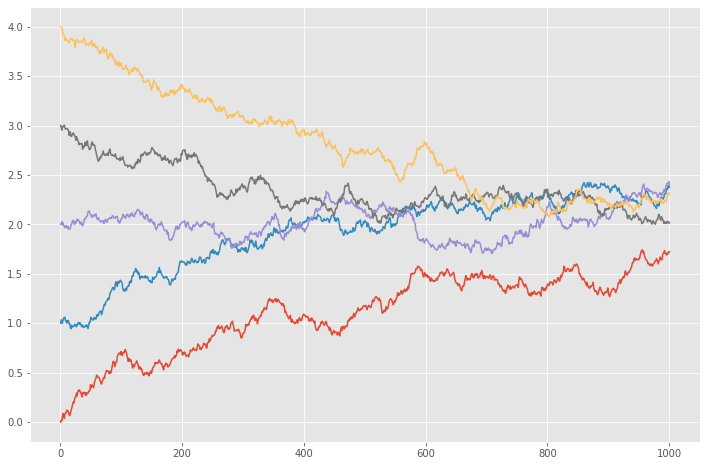

In [101]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))

for i in range(5):
    wp = o_u_process(0.01, i, Nt)
    plt.plot(time, wp)
plt.show()

## Brownian bridge

In [183]:
alpha = 1.2
sigma = 0.1
x0 = 4
Nt = 1000
def brownian_bridge(dt=0.01, x0=1, Nt=1000):
    res = [x0]
    x = x0
    
    for t in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x - (x-alpha)*dt/(Nt-t) + sigma*np.sqrt(dt)*rand_v.rvs()
#         x = alpha + (x0-alpha)*(Nt-t)/Nt + sigma*np.sqrt(t*(Nt-t)/Nt)*rand_v.rvs()
        res.append(x)
        
    return res

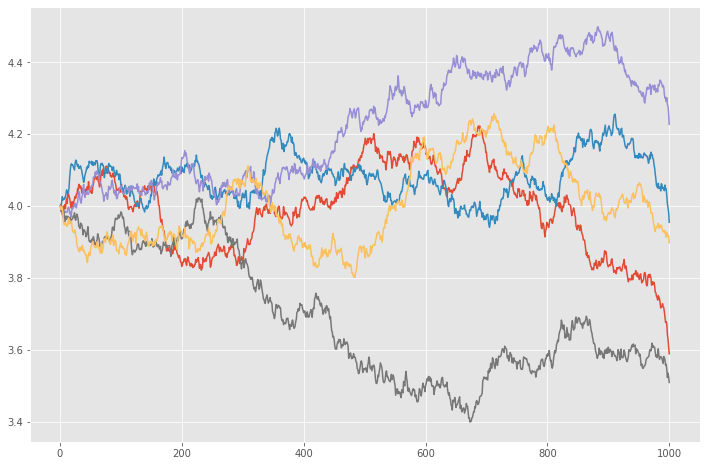

In [184]:
time = np.linspace(1, Nt, Nt)
plt.subplots(figsize=(12,8))

for _ in range(5):
    wp = brownian_bridge(0.01, x0, Nt)
    plt.plot(time, wp)
plt.show()

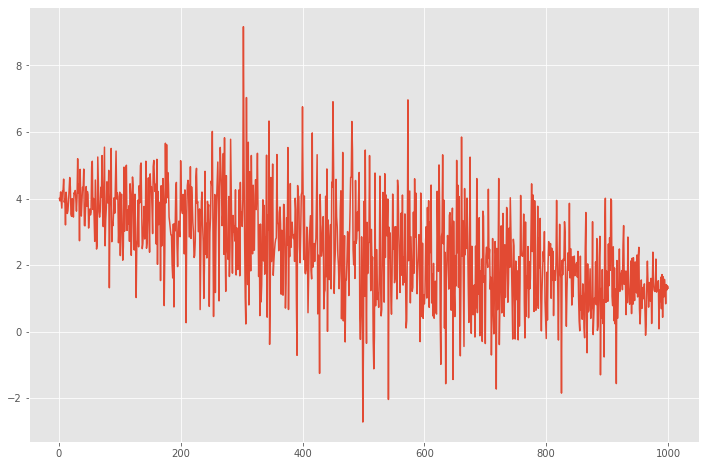

In [189]:
def x(t):
    rand_v = sts.norm(0, 1)
    return alpha + (x0-alpha)*(Nt-t)/Nt + sigma*np.sqrt(t*(Nt-t)/Nt)*rand_v.rvs()

array=[]
plt.subplots(figsize=(12,8))

for t in range(0,1000,1):
    array.append(x(t))

plt.plot(time, array)
plt.show()

In [190]:
x(1000)

1.2

# Application to the function

In [129]:
t0 = 0
x0 = 1
alpha = 0.8
sigma = 10
Nt = 1000
gamma = 0.1

#Runge-Kutt method
def runge_Kutt(f, t0, x0, h, b):
    t = t0
    x = x0
    array = np.array([])
    arrayx = np.array([])
    while t<b:
        k1 = f(t, x)
        k2 = f(t + h/2,x + (h*k1)/2)
        k3 = f(t + h/2,x + (h*k2)/2)
        k4 = f(t + h,x + h*k3)
        x = x + h*(k1 + 2*k2 + 2*k3 + k4)/6
        array = np.append(array, t)
        arrayx = np.append(arrayx, x)
        t += h
    return array, arrayx

def f(t, x):
    return gamma*x

#brownian bridge
def f_stoh(t, x):
#     rv = sts.uniform(-1, 1)
    rand_v = sts.norm(0, 1)
    d = alpha + (x0-alpha)*(Nt-t)/(Nt-t0) + sigma*np.sqrt((t-t0)*(Nt-t)/(Nt-t0))*rand_v.rvs()
    return gamma*d

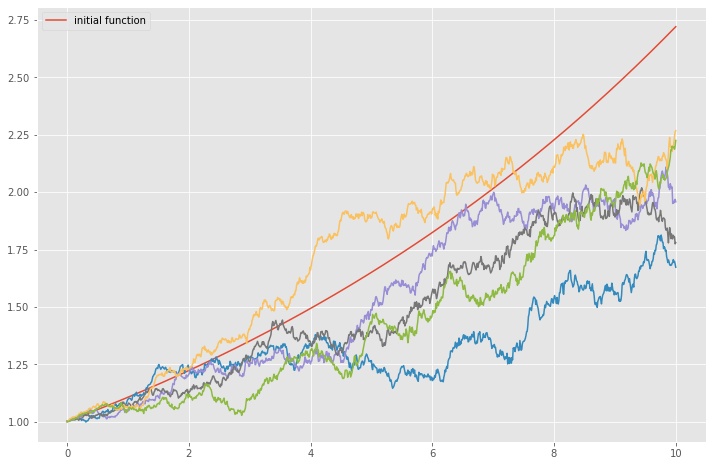

In [130]:
plt.subplots(figsize=(12, 8))
p1, p2 = runge_Kutt(f, t0, x0, 0.01, 10)
hist_array = []

plt.plot(p1, p2, label='initial function')
for i in range(5):
    p1S, p2S = runge_Kutt(f_stoh, t0, x0, 0.01, 10)
    plt.plot(p1S, p2S)
    hist_array.append(p2S)
plt.legend()
plt.show()

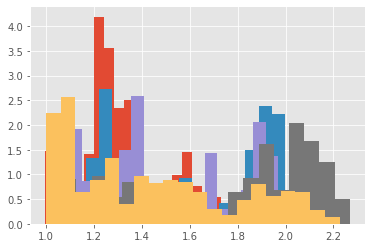

In [131]:
for item in hist_array:
    plt.hist(item, bins=20, density=True)
plt.show()

In [134]:
t0 = 0
x0 = 1
mu = 0.1
sigma = 0.6
Nt = 1000
gamma = 0.1

def f(t, x):
    return gamma*x

def log_x(t, x):
    rand_v = sts.norm(0, 1)
    d = x0*np.exp((mu - (sigma**2)/2)*t+sigma*np.sqrt(t)*rand_v.rvs())
    return gamma*d

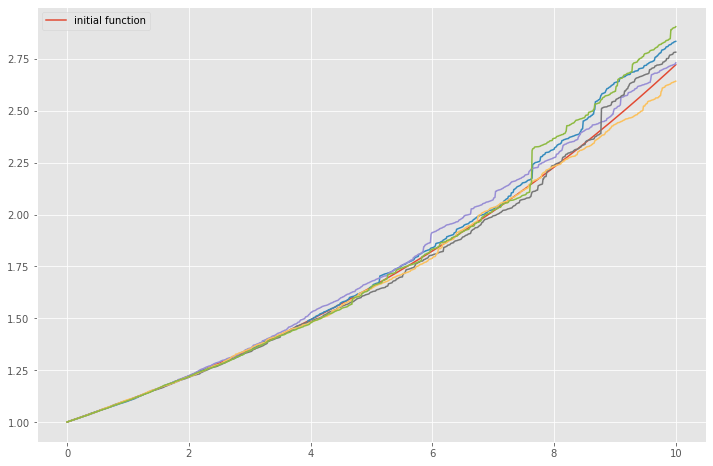

In [135]:
plt.subplots(figsize=(12, 8))
p1, p2 = runge_Kutt(f, t0, x0, 0.01, 10)

plt.plot(p1, p2, label='initial function')
for i in range(5):
    p1S, p2S = runge_Kutt(log_x, t0, x0, 0.01, 10)
    plt.plot(p1S, p2S)
plt.legend()
plt.show()

In [164]:
log_x(0, 1)

1.1

In [199]:
t0 = 0
x0 = 1
beta = 0.3
sigma = 1.5
alpha = 1
Nt = 1000
gamma = 0.1

def f(t, x):
    return gamma*x

def o_u(t, x):
    rand_v = sts.norm(0, 1)
    d = alpha + (x0-alpha)*np.exp(-beta*t)+sigma*np.sqrt(1-np.exp(-2*beta*t))*rand_v.rvs()/np.sqrt(2*beta)
    return gamma*d

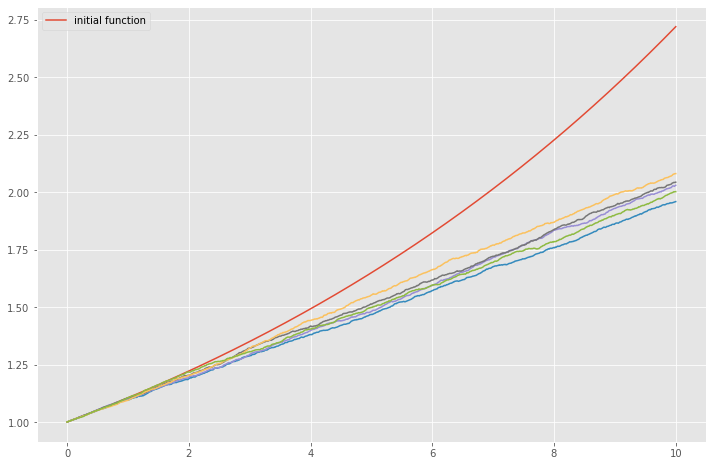

In [200]:
plt.subplots(figsize=(12, 8))
p1, p2 = runge_Kutt(f, t0, x0, 0.01, 10)

plt.plot(p1, p2, label='initial function')
for i in range(5):
    p1S, p2S = runge_Kutt(o_u, t0, x0, 0.01, 10)
    plt.plot(p1S, p2S)
plt.legend()
plt.show()

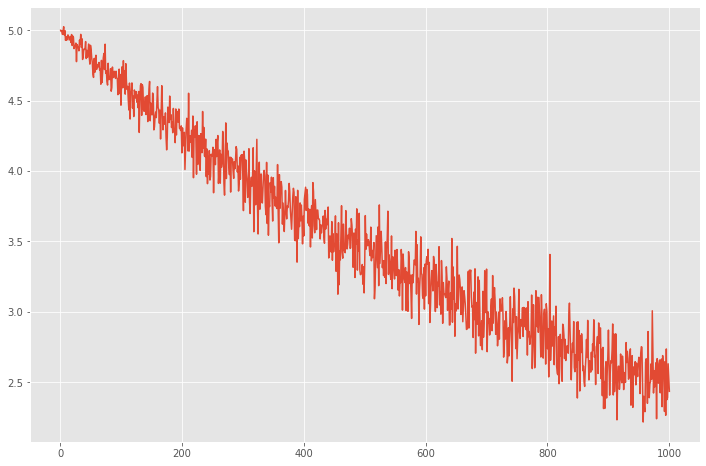

In [213]:
array = []
beta = 0.001
alpha = 1
sigma = 0.008
x0 = 5
Nt=1000

def x(t):
    rand_v = sts.norm(0, 1)
    return alpha + (x0-alpha)*np.exp(-beta*t)+sigma*np.sqrt(1-np.exp(-2*beta*t))*rand_v.rvs()/np.sqrt(2*beta)

array=[]
plt.subplots(figsize=(12,8))

for t in range(0,1000,1):
    array.append(x(t))

plt.plot(time, array)
plt.show()